# Import Libraries

In [ ]:
!pip install turicreate

In [340]:
import turicreate
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from wordcloud import WordCloud

# Data Reading

In [341]:
df = pd.read_csv('amazon_baby.csv')

In [342]:
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [343]:
df.isna().mean()

name      0.001733
review    0.004517
rating    0.000000
dtype: float64

In [344]:
df['name'] = df['name'].str.replace('$', '')

In [345]:
df = df[df.groupby("name")["name"].transform('size') > 20]
df['name'].value_counts()

Vulli Sophie the Giraffe Teether                                                    785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                                 562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision            561
Baby Einstein Take Along Tunes                                                      547
Cloud b Twilight Constellation Night Light, Turtle                                  520
                                                                                   ... 
Ameda Purely Yours Ultra Breast Pump                                                 21
Maxi-Cosi Priori Convertible Car Seat, Gipsy                                         21
Sunshine Kids Cool Shade For Car Window, Black                                       21
Mommy\'s Helper Inflatable Bath Tub Froggie Collection, White/Green, 6-18 Months     21
Lansinoh mOmma Bottle with NaturalWave Nipple, 8 Ounce                               21
Name: name, Length: 1707, dtype:

# Visiulation

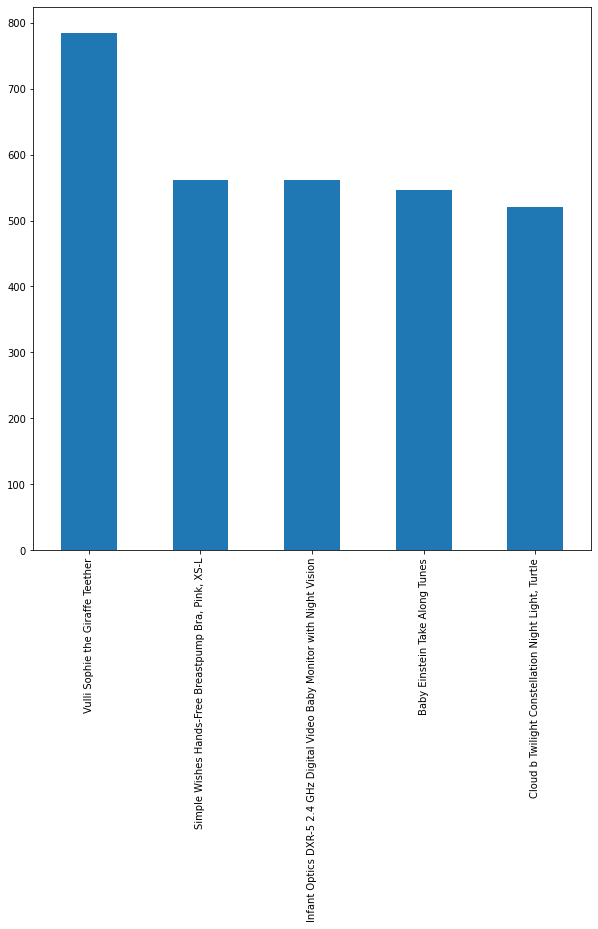

In [346]:
plt.figure(figsize=(10,10))
df['name'].value_counts()[:5].plot.bar()

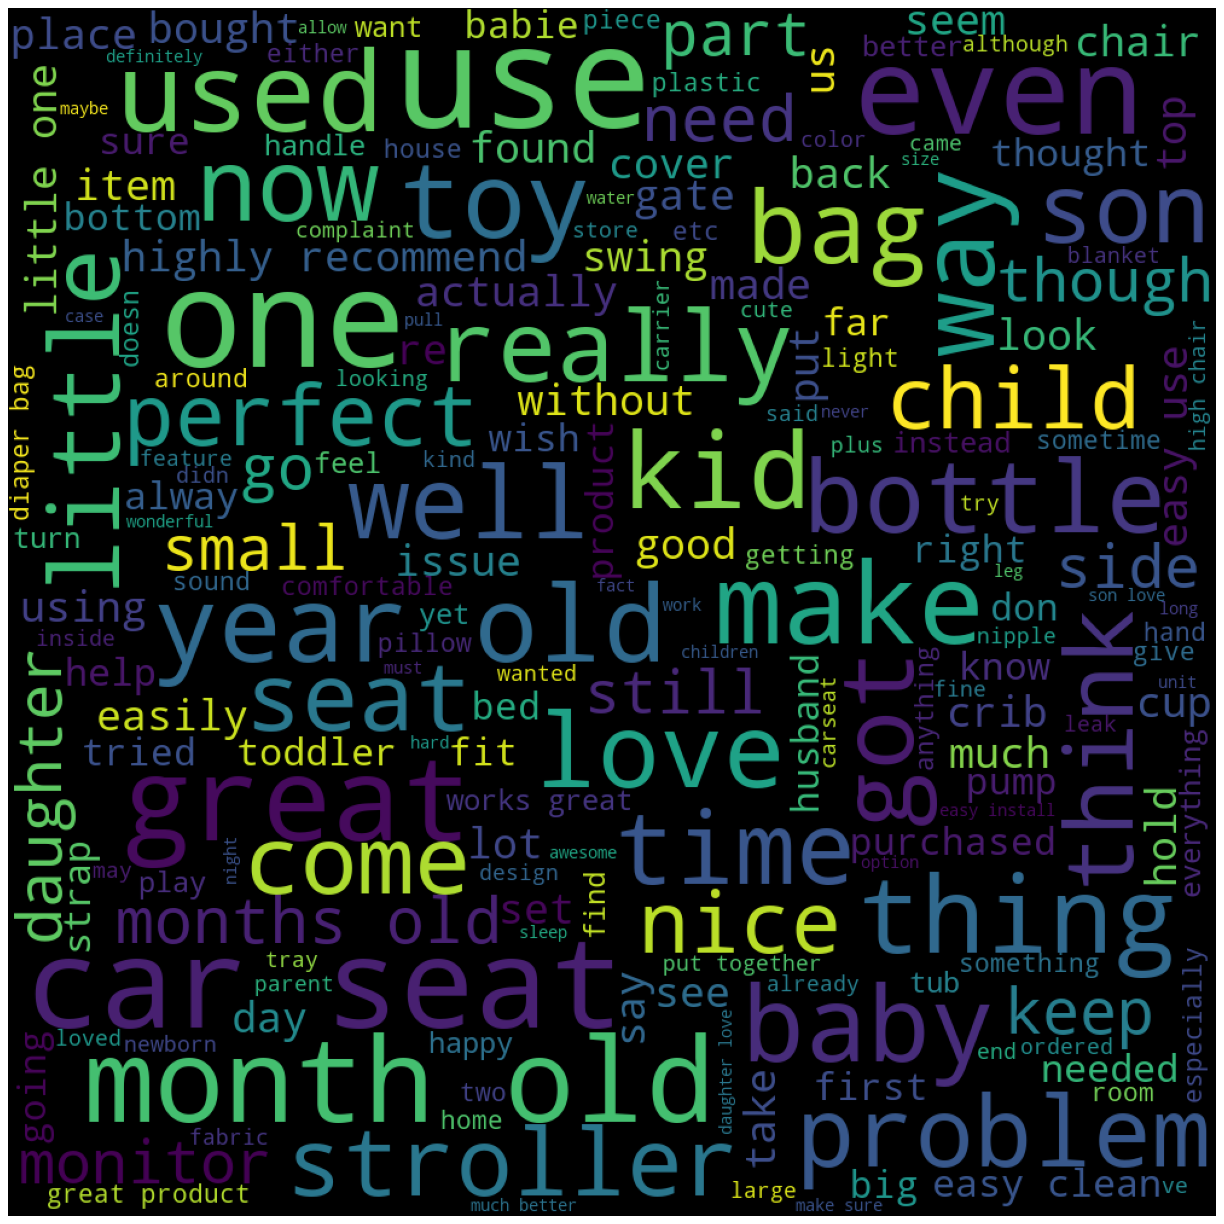

In [347]:
allwords = " ".join([txt for txt in df["review"].astype(str)])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()


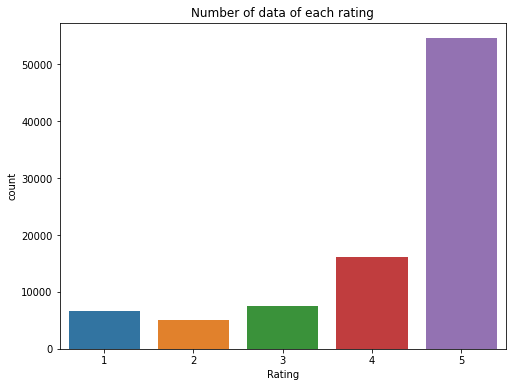

In [402]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.xlabel("Rating")
plt.title("Number of data of each rating")
plt.show()

In [403]:
df['review_len'] = df['review'].astype(str).apply(len)

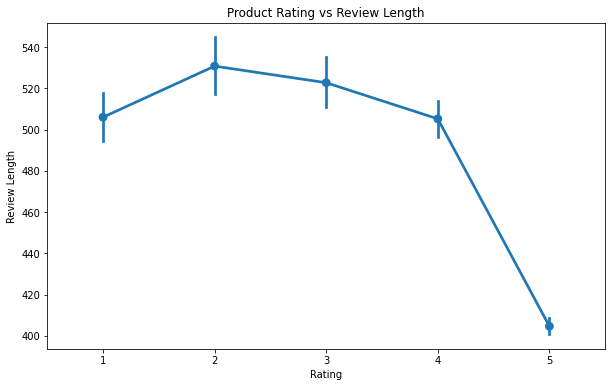

In [404]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "rating", y = "review_len", data = df)
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Product Rating vs Review Length")
plt.show()

# Most Reviewed product

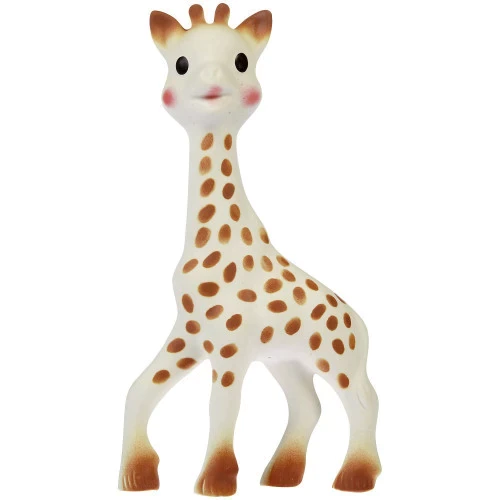

In [348]:
most_reviewed = sf[sf['name']=="Vulli Sophie the Giraffe Teether"]


In [349]:
len(most_reviewed)

723

# Turicreate

In [350]:
sf = turicreate.SFrame.read_csv('amazon_baby.csv')


Finished parsing file /content/amazon_baby.csv

Parsing completed. Parsed 100 lines in 1.21046 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 105270 lines. Lines per second: 76924.1

Finished parsing file /content/amazon_baby.csv

Parsing completed. Parsed 183531 lines in 1.57621 secs.

In [351]:
sf.head()


name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4


In [352]:
sf['word_count'] = turicreate.text_analytics.count_words(sf['review'])
sf

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5,"{'recommend': 1.0,'highly': 1.0, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ..."


In [353]:
sf['rating'].show('Categorical')


Materializing SArray

# Data Preprocessing

In [354]:
sf= sf[sf['rating'] !=3]

In [355]:
sf['sentiment'] = sf['rating'] >=3
sf['sentiment'].value_counts()

value,count
1,140259
0,26493


In [356]:
sf.tail()

name,review,rating,word_count,sentiment
Airline Seat BeltExtender - The Best ...,"Up until recently I havehated flying, putting on ...",5,"{'pressure': 1.0, 'so':1.0, 'relieved': 1.0, ...",1
Airline Seat BeltExtender - The Best ...,I bought this as afather's day gift for my ...,5,"{'highly': 1.0, 'again':1.0, 'thanked': 1.0, ...",1
Squeasy Snacker 6ozSilicone Reusable Food ...,"I love that these canhold purees OR liquids, ...",5,"{'cool': 1.0, 'oz': 1.0,'sizes': 1.0, 'more': ...",1
Squeasy Snacker 6ozSilicone Reusable Food ...,"I love this product, itmakes my life easier. ...",5,"{'forward': 1.0, 'look':1.0, 'works': 1.0, ...",1
Squeasy Snacker 6ozSilicone Reusable Food ...,This reusable squeezebottle is the best I ...,5,"{'product': 1.0,'awesome': 1.0, 'gifts': ...",1
Baby Teething Necklacefor Mom Pretty Donut ...,Such a great idea! veryhandy to have and look ...,5,"{'teething': 1.0, 'of':1.0, 'pain': 1.0, 'ha ...",1
Baby Teething Necklacefor Mom Pretty Donut ...,This product rocks! Itis a great blend of ...,5,"{'accessible': 1.0,'soothe': 1.0, 'easily': ...",1
Abstract 2 PK Baby /Toddler Training Cup ...,This item looks great andcool for my kids....I ...,5,"{'its': 1.0, 'this': 2.0,'item': 1.0, 'looks': ...",1
"Baby Food Freezer Tray -Bacteria Resistant, BPA ...",I am extremely happy withthis product. I have ...,5,"{'way': 1.0, 'an': 1.0,'looking': 1.0, 'pare ...",1
Best 2 Pack Baby CarShade for Kids - Window ...,I love this product verymush . I have bought ...,5,"{'of': 1.0, 'also': 1.0,'well': 1.0, 'sun': 1.0, ...",1


# Create a Logistic Classifer Model

In [357]:
train_data,test_data=sf.random_split(0.8, seed=0)


In [358]:
sentiment_model = turicreate.logistic_classifier.create(train_data, target='sentiment',features=['word_count'] ,
                                                      validation_set=test_data)


Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 1.248094     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 3.022744     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 3.907766     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 4.488538     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 5.368156     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 8.554955     | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [359]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.9176975738650012,
 'auc': 0.9258242975424673,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1397 |
 |      1       |        0        |  1344 |
 |      0       |        0        |  3931 |
 |      1       |        1        | 26632 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.951057941255245,
 'log_loss': 0.33047871872209716,
 'precision': 0.9501587641371436,
 'recall': 0.9519588218472976,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0 

In [360]:
sentiment_model.evaluate(test_data, metric='roc_curve')


{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0    |        1.0         |        1.0         | 27976 | 5328 |
 |   0.001   | 0.698948948948949  | 0.9933514440949385 | 27976 | 5328 |
 |   0.002   | 0.6619744744744744 | 0.9922076065198742 | 27976 | 5328 |
 |   0.003   | 0.6385135135135135 | 0.9909922790963683 | 27976 | 5328 |
 |   0.004   |  0.62256006006006  | 0.9903846153846154 | 27976 | 5328 |
 |   0.005   | 0.6112987987987988 | 0.989848441521304  | 27976 | 5328 |
 |   0.006   | 0.6002252252252253 | 0.9894195024306548 | 27976 | 5328 |
 |   0.007   | 0.589527027027027  | 0.9888475836431226 | 27976 | 5328 |
 |   0.008   | 0.5816441441441441 | 0.9883828996282528 | 27976 | 5328 |
 |   0.009   | 0.574512012012012

In [361]:
sentiment_model.validation_accuracy


0.9176975738650012

In [362]:
sentiment_model.validation_data

word_count,sentiment
"{'i': 1.0, 'it': 2.0,'come': 1.0, 'stickers': ...",1
"{'him': 1.0, 'got': 1.0,'than': 1.0, 'turn': ...",1
"{'family': 1.0, 'over':1.0, 'to': 3.0, 'hook': ...",1
"{'baby': 1.0, '10': 1.0,'which': 1.0, 'damaged': ...",1
{},1
"{'creative': 1.0, 'has':1.0, 'bird': 1.0, 'mo ...",1
"{'sure': 1.0, 'so': 1.0,'baby': 1.0, 'fun': 1.0, ...",1
"{'color': 1.0, 'pink':1.0, 'pastel': 1.0, ...",1
"{'gift': 1.0, 'great':1.0, 'nice': 1.0, 'and': ...",1
"{'dozen': 1.0, 'and':1.0, 'bright': 1.0, ...",1


In [363]:
sentiment_model.training_roc_curve

threshold,fpr,tpr,p,n
0.0,1.0,1.0,112283,21165
0.001,0.5367824238128986,0.9998931271875529,112283,21165
0.002,0.4994566501299315,0.9998664089844411,112283,21165
0.003,0.47465154736593435,0.9998307847136254,112283,21165
0.004,0.45754783841247343,0.9998040665105136,112283,21165
0.005,0.4430900070871722,0.9997684422396979,112283,21165
0.006,0.43175053153791637,0.9997150058334744,112283,21165
0.007,0.42192298606189466,0.9996882876303625,112283,21165
0.008,0.4137963619182613,0.9996793815626587,112283,21165
0.009,0.40623671155209073,0.9996615694272508,112283,21165


In [364]:
sentiment_model.validation_roc_curve

threshold,fpr,tpr,p,n
0.0,1.0,1.0,27976,5328
0.001,0.698948948948949,0.9933514440949385,27976,5328
0.002,0.6619744744744744,0.9922076065198742,27976,5328
0.003,0.6385135135135135,0.9909922790963683,27976,5328
0.004,0.62256006006006,0.9903846153846154,27976,5328
0.005,0.6112987987987988,0.989848441521304,27976,5328
0.006,0.6002252252252253,0.9894195024306548,27976,5328
0.007,0.589527027027027,0.9888475836431226,27976,5328
0.008,0.5816441441441441,0.9883828996282528,27976,5328
0.009,0.574512012012012,0.9880611953102659,27976,5328


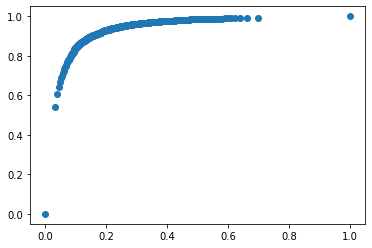

In [398]:
temp1 = sentiment_model.validation_roc_curve['fpr']
temp2 = sentiment_model.validation_roc_curve['tpr']
plt.scatter(temp1, temp2)

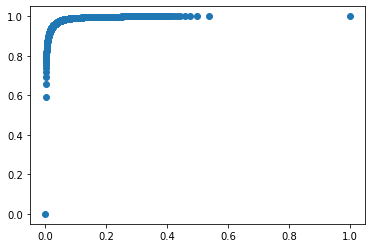

In [401]:
temp1 = sentiment_model.training_roc_curve['fpr']
temp2 = sentiment_model.training_roc_curve['tpr']
plt.scatter(temp1, temp2)

# Use Model 

In [365]:
most_reviewed['predict_sentiment'] = sentiment_model.predict(most_reviewed, output_type='probability')


In [366]:
most_reviewed = most_reviewed.sort('predict_sentiment' , ascending=False)


In [367]:
temp = most_reviewed.remove_column("word_count", inplace=False)
temp

name,review,rating,sentiment,awsome,great,amazing,love,horrible
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5,1,0,0.0,0.0,1.0,0
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4,1,0,1.0,0.0,0.0,0
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5,1,0,2.0,0.0,1.0,0
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5,1,0,0.0,0.0,0.0,0
Vulli Sophie the GiraffeTeether ...,"As every mom knows, youalways want to give your ...",5,1,0,0.0,0.0,0.0,0
Vulli Sophie the GiraffeTeether ...,My Mom-in-Law boughtSophie for my son whe ...,5,1,0,0.0,0.0,2.0,0
Vulli Sophie the GiraffeTeether ...,"My 4 month old son isteething, and I've tried ...",4,1,0,0.0,0.0,0.0,0
Vulli Sophie the GiraffeTeether ...,Let me just start off byaddressing the choking ...,5,1,0,0.0,0.0,0.0,0
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4,1,0,0.0,0.0,0.0,0
Vulli Sophie the GiraffeTeether ...,"I admit, I didn't getSophie the Giraffe at ...",4,1,0,1.0,0.0,1.0,0


# Most positive

In [368]:
temp[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

#Most Negative

In [369]:
temp[-1]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [370]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 
                  'awful', 'wow', 'hate']

In [371]:
def awsome_count(word_count):
    if 'awsome' in word_count:
        return word_count['awsome']
    else:
        return 0
sf['awesome']= sf['word_count'].apply(awsome_count)


def great_count(word_count):
    if 'great' in word_count:
        return word_count['great']
    else:
        return 0
sf['great'] = sf['word_count'].apply(great_count)


def amazing_count(word_count):
    if 'amazing' in word_count:
        return word_count['amazing']
    return 0

sf['amazing'] = sf['word_count'].apply(amazing_count)


def love_count(word_count):
    if 'love' in word_count:
        return word_count['love']
    return 0

sf['love'] = sf['word_count'].apply(love_count)




def horrible_count(word_count):
    if 'horrible' in word_count:
        return word_count['horrible']
    else:
        return 0

sf['horrible'] = sf['word_count'].apply(horrible_count)



def bad_count(word_count):
    if 'bad' in word_count:
        return word_count['bad']
    else:
        return 0
sf['bad']= sf['word_count'].apply(bad_count)



def terrible_count(word_count):
    if 'terrible' in word_count:
        return word_count['terrible']
    else:
        return 0
sf['terrible']= sf['word_count'].apply(terrible_count)



def awful_count(word_count):
    if 'awful' in word_count:
        return word_count['awful']
    else:
        return 0
sf['awful']= sf['word_count'].apply(awful_count)



def wow_count(word_count):
    if 'wow' in word_count:
        return word_count['wow']
    else:
        return 0
sf['wow']= sf['word_count'].apply(wow_count)



def hate_count(word_count):
    if 'hate' in word_count:
        return word_count['hate']
    else:
        return 0
sf['hate']= sf['word_count'].apply(hate_count)

In [394]:
sf['awesome'].show('categorical')

Materializing SArray

In [395]:
sf['great'].show('categorical')

Materializing SArray

In [396]:
sf['amazing'].show('categorical')

Materializing SArray

In [393]:
sf['bad'].show('categorical')

Materializing SArray

# Selected Words Model

In [376]:
train_data,test_data = sf.random_split(.8, seed=0)


In [377]:
selected_words = [ 'great', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']


In [378]:
selected_words_model = turicreate.logistic_classifier.create(train_data,
                                                     target='sentiment',
                                                     features=selected_words,
                                                     validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 9

Number of unpacked features : 9

Number of coefficients      : 10

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.223459     | 0.847409          | 0.845814            |

| 2         | 3        | 0.362552     | 0.847529          | 0.846025            |

| 3         | 4        | 0.506298     | 0.847416          | 0.845874            |

| 4         | 5        | 0.645433     | 0.847431          | 0.845844            |

| 5         | 6        | 0.804021     | 0.847431          | 0.845844            |

| 6         | 7        | 0.944176     | 0.847431          | 0.845844            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [379]:
coefficients = selected_words_model.coefficients

In [380]:
coefficients

name,index,class,value,stderr
(intercept),None,1,1.355371392827719,0.008885724681725684
great,None,1,0.867905957698798,0.01894332116823726
amazing,None,1,1.1303725162629668,0.09970582416373072
love,None,1,1.365901252058386,0.028034489140532245
horrible,None,1,-2.2266766057703804,0.07977902253017805
bad,None,1,-0.979199764679288,0.038387441963086785
terrible,None,1,-2.2123456100266052,0.07697956270684687
awful,None,1,-2.0234415752111956,0.10051330551899375
wow,None,1,0.013360066931526868,0.15998460950094148
hate,None,1,-1.3273633765866857,0.07671204386970704


In [381]:
coefficients = coefficients.sort('value', ascending=False)
coefficients

name,index,class,value,stderr
love,None,1,1.365901252058386,0.028034489140532245
(intercept),None,1,1.355371392827719,0.008885724681725684
amazing,None,1,1.1303725162629668,0.09970582416373072
great,None,1,0.867905957698798,0.01894332116823726
wow,None,1,0.013360066931526868,0.15998460950094148
bad,None,1,-0.979199764679288,0.038387441963086785
hate,None,1,-1.3273633765866857,0.07671204386970704
awful,None,1,-2.0234415752111956,0.10051330551899375
terrible,None,1,-2.2123456100266052,0.07697956270684687
horrible,None,1,-2.2266766057703804,0.07977902253017805


In [382]:
coefficients.sort('value', ascending=True)


name,index,class,value,stderr
horrible,None,1,-2.2266766057703804,0.07977902253017805
terrible,None,1,-2.2123456100266052,0.07697956270684687
awful,None,1,-2.0234415752111956,0.10051330551899375
hate,None,1,-1.3273633765866857,0.07671204386970704
bad,None,1,-0.979199764679288,0.038387441963086785
wow,None,1,0.013360066931526868,0.15998460950094148
great,None,1,0.867905957698798,0.01894332116823726
amazing,None,1,1.1303725162629668,0.09970582416373072
(intercept),None,1,1.355371392827719,0.008885724681725684
love,None,1,1.365901252058386,0.028034489140532245


In [383]:
selected_words_model.evaluate(test_data)

{'accuracy': 0.8458443430218593,
 'auc': 0.6870826773388343,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  117  |
 |      0       |        0        |  311  |
 |      0       |        1        |  5017 |
 |      1       |        1        | 27859 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9156313679090251,
 'log_loss': 0.3978330456770259,
 'precision': 0.8473962769193333,
 'recall': 0.995817843866171,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 5328 |

In [384]:
selected_words_model.evaluate(test_data, metric='roc_curve')


{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 5328 |
 |   0.001   | 0.9994369369369369 | 1.0 | 27976 | 5328 |
 |   0.002   | 0.9992492492492493 | 1.0 | 27976 | 5328 |
 |   0.003   | 0.9990615615615616 | 1.0 | 27976 | 5328 |
 |   0.004   | 0.9990615615615616 | 1.0 | 27976 | 5328 |
 |   0.005   | 0.9984984984984985 | 1.0 | 27976 | 5328 |
 |   0.006   | 0.9981231231231231 | 1.0 | 27976 | 5328 |
 |   0.007   | 0.9979354354354354 | 1.0 | 27976 | 5328 |
 |   0.008   | 0.9979354354354354 | 1.0 | 27976 | 5328 |
 |   0.009   | 0.9973723723723724 | 1.0 | 27976 | 5328 |
 +-----------+--------------------+-----+-------+------+
 [1001 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(nu

In [385]:
most_reviewed['predict_sentiment'] = selected_words_model.predict(most_reviewed, output_type='probability')


In [386]:
most_reviewed = most_reviewed.sort('predict_sentiment' , ascending=False)

In [387]:
temp = most_reviewed.remove_column("word_count", inplace=False)

name,review,rating,sentiment,awsome,great,amazing,love,horrible
Vulli Sophie the GiraffeTeether ...,"Great feel, great squeek,great quality, great ...",5,1,0,5.0,0.0,0.0,0
Vulli Sophie the GiraffeTeether ...,Love it! Love it! Loveit! The best teether I ...,5,1,0,0.0,0.0,3.0,0
Vulli Sophie the GiraffeTeether ...,Sophie is one of mydaughter's favorite t ...,5,1,0,0.0,0.0,3.0,0
Vulli Sophie the GiraffeTeether ...,We love Sophie at ourhouse... she is a great ...,5,1,0,3.0,0.0,1.0,0
Vulli Sophie the GiraffeTeether ...,This is the first reviewI've written for ...,4,1,0,1.0,0.0,2.0,0
Vulli Sophie the GiraffeTeether ...,All my grandbabies lovethis toy. It smells g ...,5,1,0,1.0,0.0,2.0,0
Vulli Sophie the GiraffeTeether ...,My 5mo daughter iscompletely in love with ...,5,1,0,1.0,0.0,2.0,0
Vulli Sophie the GiraffeTeether ...,"Being a childphotographer, I saw lots ...",4,1,0,1.0,0.0,2.0,0
Vulli Sophie the GiraffeTeether ...,Had one for my first twochildren but it had seen ...,5,1,0,1.0,0.0,2.0,0
Vulli Sophie the GiraffeTeether ...,We just got our adorableSophie this week and ...,5,1,0,1.0,0.0,2.0,0


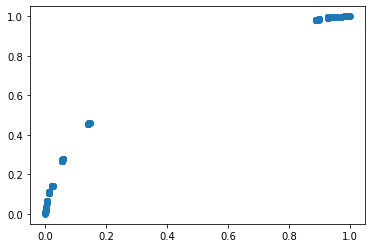

In [388]:
temp1 = selected_words_model.validation_roc_curve['fpr']
temp2 = selected_words_model.validation_roc_curve['tpr']
plt.scatter(temp1, temp2)

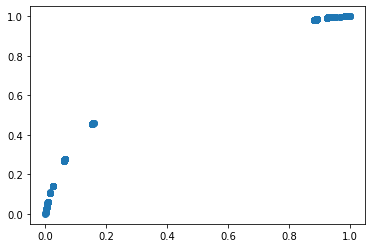

In [389]:
temp3 = selected_words_model.training_roc_curve['fpr']
temp4 = selected_words_model.training_roc_curve['tpr']
plt.scatter(temp3, temp4)